# Prosta analityka
W tym zadaniu wykorzystamy pakiet pandas do analizowania rozkładów zmiennych oraz testowania hipotez statystycznych.

W trakciezadania  pracowac bedziemy z zestawem danych dotyczacym degustacji wina z Uniwersytetu w [Californii](https://archive.ics.uci.edu/ml/datasets/wine+quality)

Dane zostały przekształcone do pliku XLS, który znajduje się na platformie Github pod adresem:

In [ ]:
URL = "https://github.com/jakubrybacki/Karowa_Python_Introduction/blob/main/Zbiory%20cwiczen%20pandas/Zadanie%202%20-%20testy%20statystyczne/DaneWino.xlsx?raw=true"

## Polecenie 1:
Zaimportuj bibliotekę pandas. Wykorzystaj adres URL u góry do wczytania informacji do ramki danych. Wyświetl sturkturę pliku.

In [ ]:
import pandas as pd

dane = pd.read_excel(URL)
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Polecenie 2:
Od tego momentu interesować będą nas wyłącznie kolumny *Type* oraz *quality*.

W pierwszej kolejności sprawdźmy co zawiera kolumna typ - będziemy potrzebowali tabele częstości.

Pomoże nam funkcja *value_counts()*

In [ ]:
dane.Type.value_counts()

white    4898
red      1599
Name: Type, dtype: int64

# Polecenie 3:
Umiemy policzyć częstości. To może czas na tabelę krzyżową. Sprawdźmy jak wyglądać będzie następująca tabela:


*   W wierszach ocena jakości (zmienna *quality*)
*   W kolumnach typ wina - białe, czerwone (zmienna *Type*)

Wykorzystajmy funkcję *crosstab* - [dokumentacja](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

W pierwszej kolejności przedstawmy same wartości dla każdej z ocen:


In [ ]:
tabela1 = pd.crosstab(index=dane["quality"],
                      columns=dane["Type"],
                      margins=False)
tabela1

Type,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


Teraz powtórzmy tą tabelę, tylko z odsetkami ocen dla każdego typu wina.

In [ ]:
tabela2 = pd.crosstab(index=dane["quality"],
                      columns=dane["Type"],
                      normalize = "columns",
                      margins=True)
tabela2

Type,red,white,All
quality,,,
3,0.006254,0.004083,0.004618
4,0.033146,0.033279,0.033246
5,0.425891,0.297468,0.329075
6,0.398999,0.448755,0.436509
7,0.124453,0.179665,0.166077
8,0.011257,0.035729,0.029706
9,0.000000,0.001021,0.000770


# Polecenie 4:
Sprawdzanie czegoś w tabelach na dłuższą metę jest męczące. Stwórzmy wykres pudełkowy.

Pomoże funkcja *boxplot* - [dokumentacja](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ee68db580>,
      dtype=object)

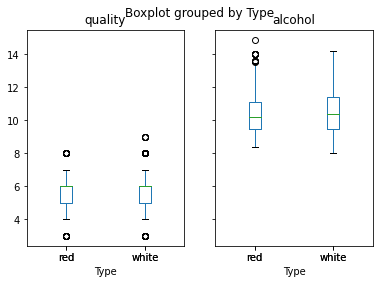

In [ ]:
dane.boxplot(by ='Type', column =['quality', 'alcohol'], grid = False)

**Wskazówka:** Wykresy Boxplot z pandas wyglądają brzydko. Istnieje biblioteka seaborn, która w dużym stopniu niweluje takie mankamenty.

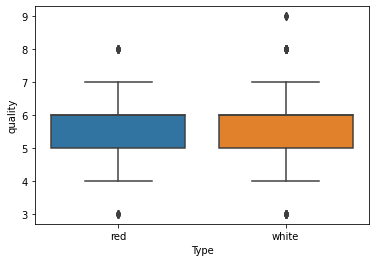

In [ ]:
import seaborn as sns

sns.boxplot(x = 'Type', y = 'quality', data = dane)

# Polecenie 5:
Tabele przestawne, czy wykres pudełkowy nie pomagają nam okreslić jakie wino jest bardziej preferowane - czerwone czy białe. Posłużmy się testem t-studenta, aby to jednoznacznie osądzić.

Najpierw stwórzmy dwie ramki w których osobno pogrupowane będą oba typy wina.

Sprawdźmy też jakie były średnie oceny jakości w każdej grupie.  

In [ ]:
grupa1 = dane[dane.Type == "red"]
grupa2 = dane[dane.Type == "white"]

print(grupa1.quality.mean())
print(grupa2.quality.mean())

5.6360225140712945
5.87790935075541


Następnie wykorzystamy bibliotekę scipy - [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

Naszą hipotezą zarową jest rónwosć średnich. W pierwszej kolejności przeprowadzamy test z alternatywą braku równości:

In [ ]:
import scipy

scipy.stats.ttest_ind(grupa1.quality, grupa2.quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

Niska wartość p-value wskazuje, że odrzuczimy taką hipotezę. Zróbmy drugi test z alternatywą, że pierwsza średnia jest większa.   

In [ ]:
scipy.stats.ttest_ind(grupa1.quality, grupa2.quality, alternative="greater", equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=1.0)